In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test_data = pd.read_csv('data/test.csv')

In [3]:
train_data = pd.read_csv('data/train.csv')

In [4]:
sample_submission = pd.read_csv('data/sample_submission.csv')

In [5]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train_data.shape

(1460, 81)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
train_data.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [9]:
train_data.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [10]:
train_data.MoSold.value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

In [11]:
train_data.YrSold.value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [12]:
train_data.groupby(['YrSold','MoSold']).size()

YrSold  MoSold
2006    1         10
        2          9
        3         25
        4         27
        5         38
        6         48
        7         67
        8         23
        9         15
        10        24
        11        16
        12        12
2007    1         13
        2          8
        3         23
        4         23
        5         43
        6         59
        7         51
        8         40
        9         11
        10        16
        11        24
        12        18
2008    1         13
        2         10
        3         18
        4         26
        5         38
        6         51
        7         49
        8         29
        9         17
        10        22
        11        17
        12        14
2009    1         12
        2         10
        3         19
        4         26
        5         37
        6         59
        7         61
        8         30
        9         20
        10        27
        11        2

C:\Users\Suhasini\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


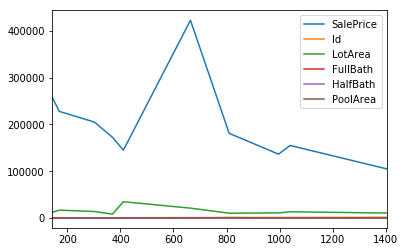

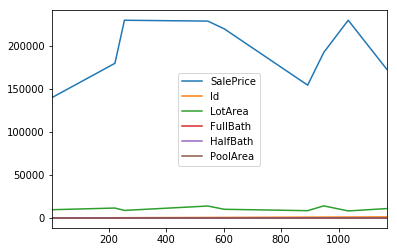

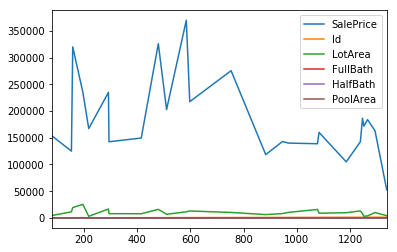

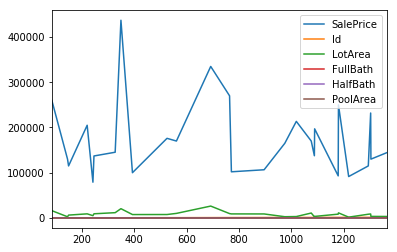

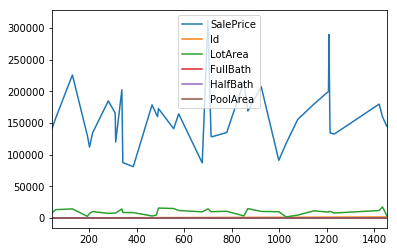

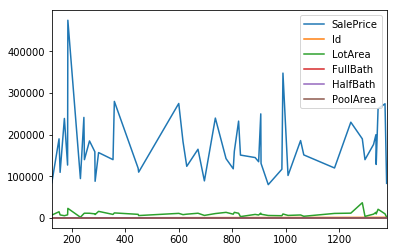

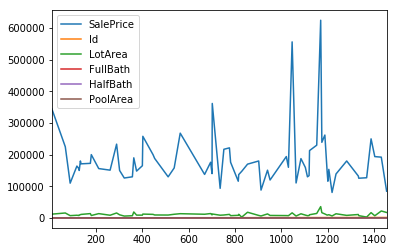

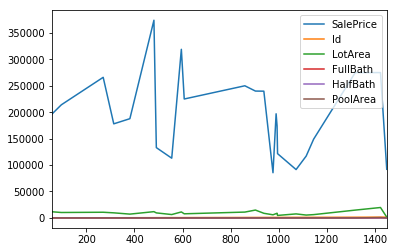

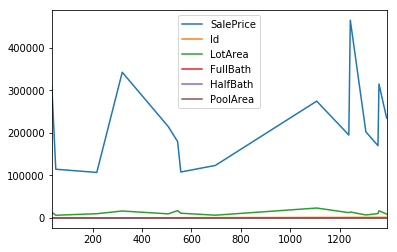

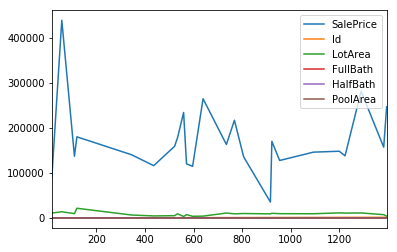

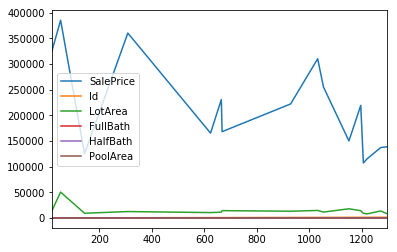

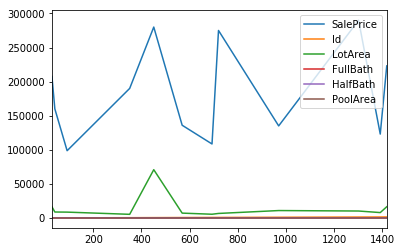

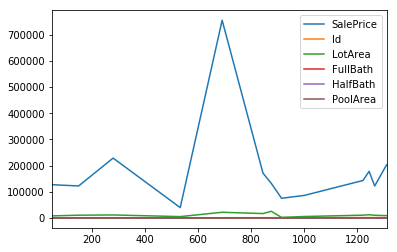

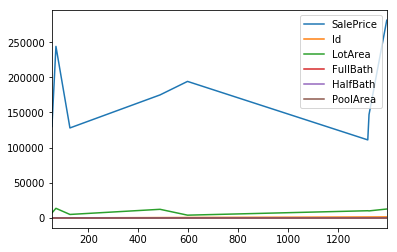

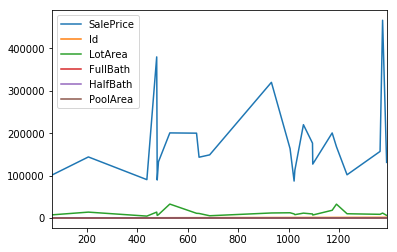

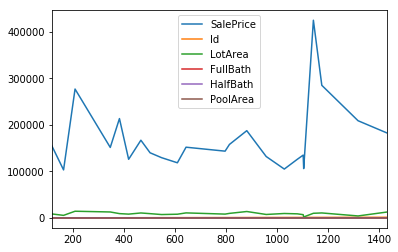

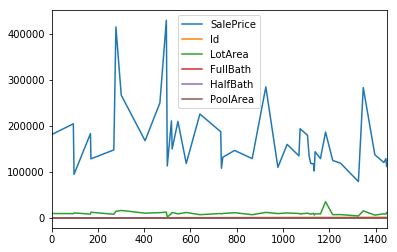

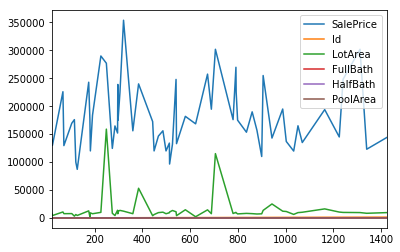

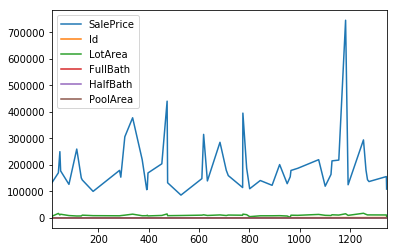

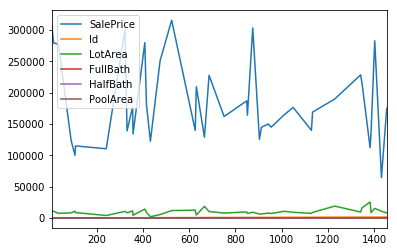

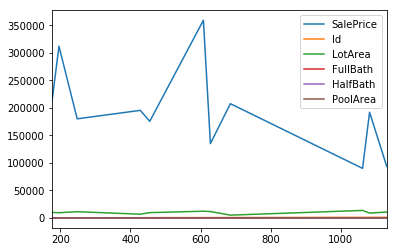

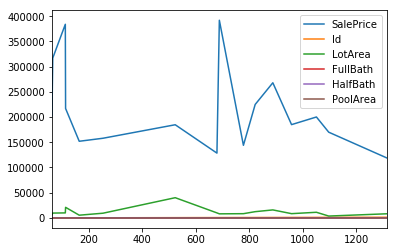

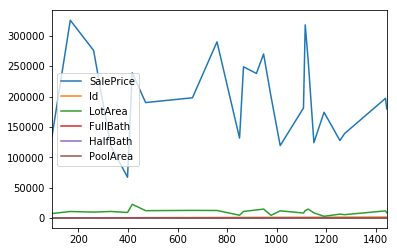

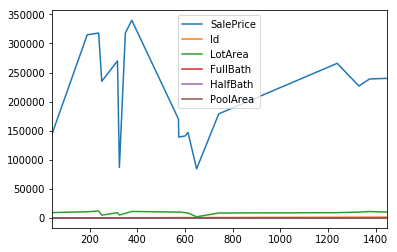

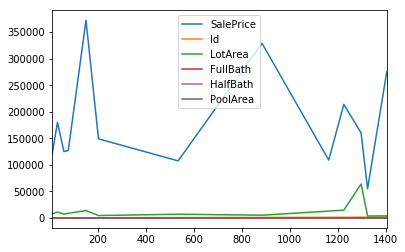

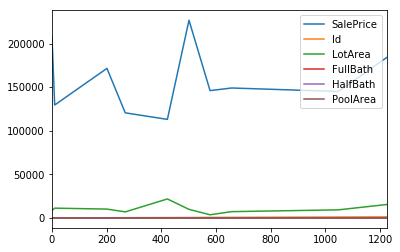

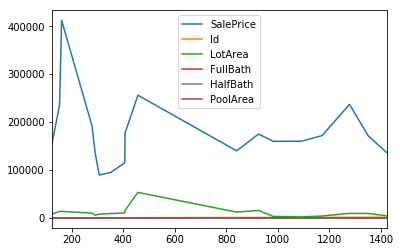

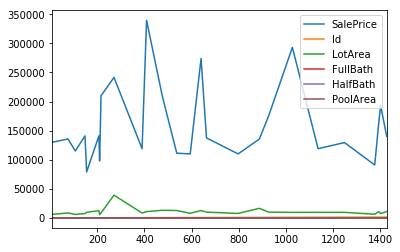

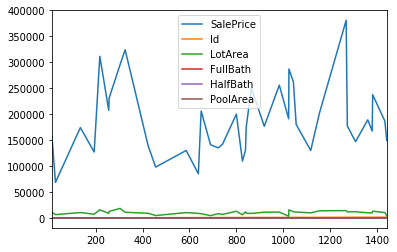

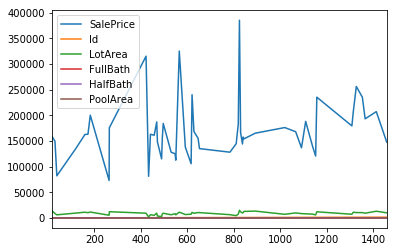

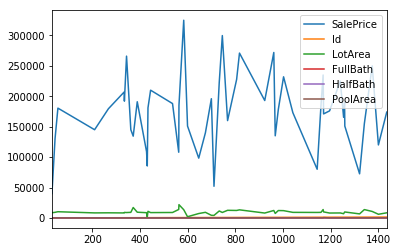

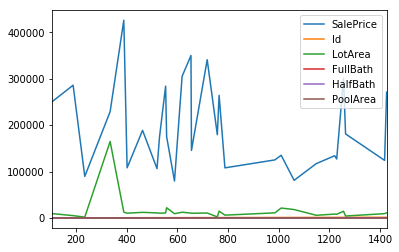

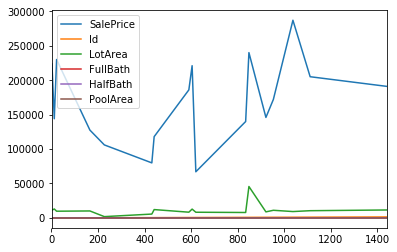

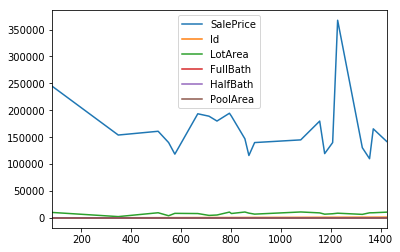

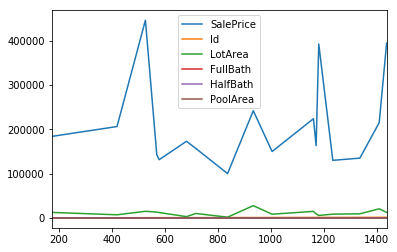

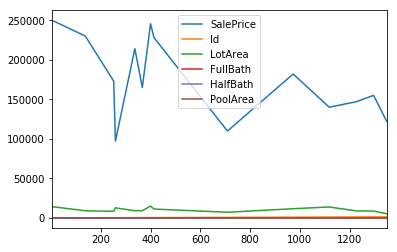

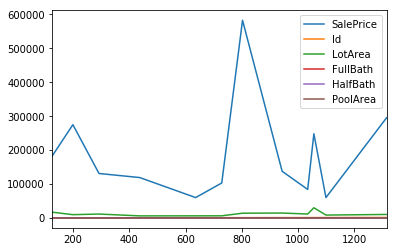

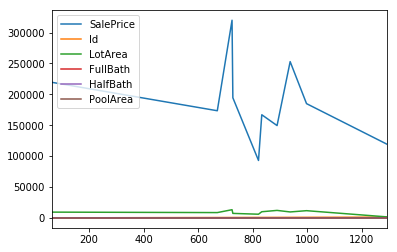

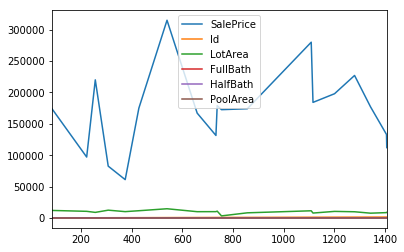

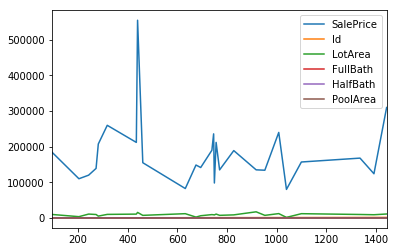

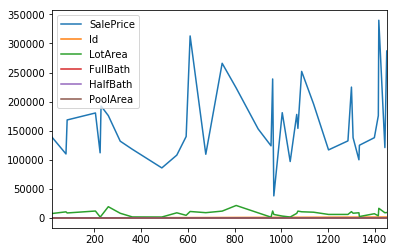

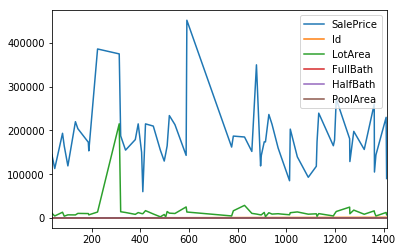

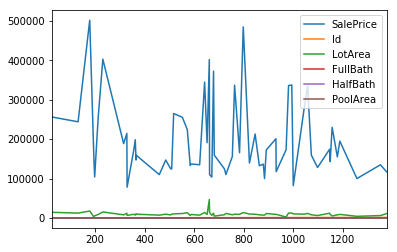

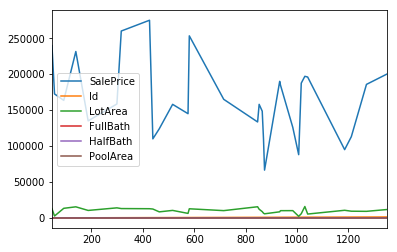

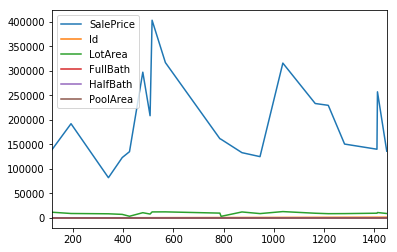

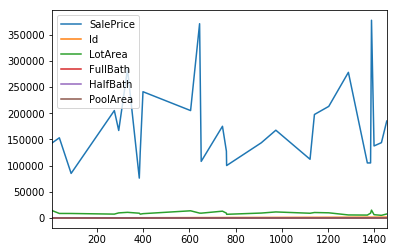

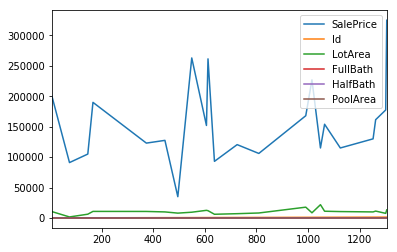

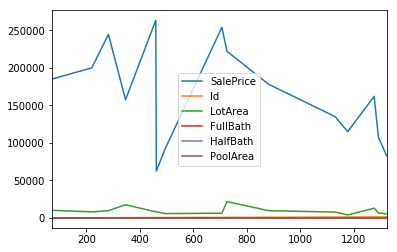

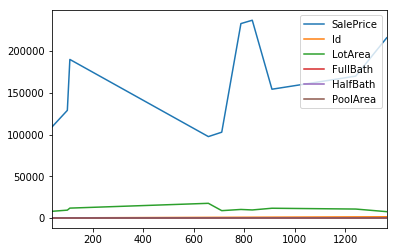

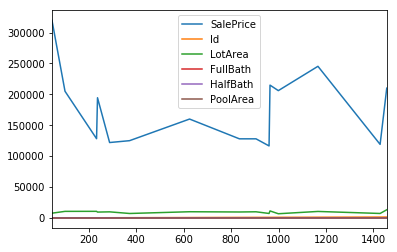

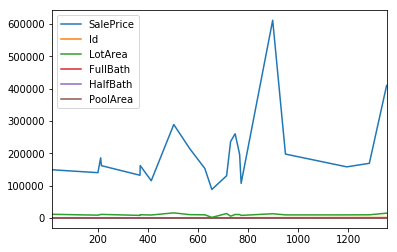

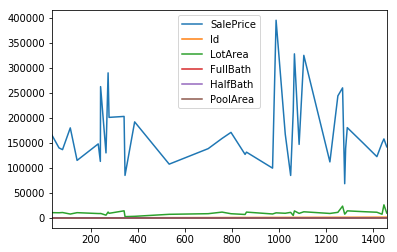

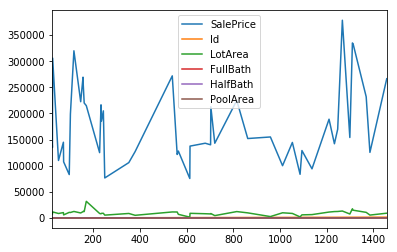

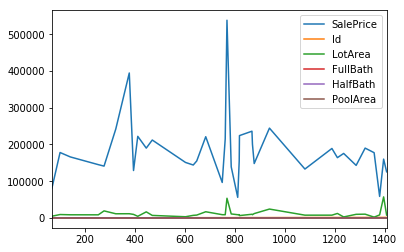

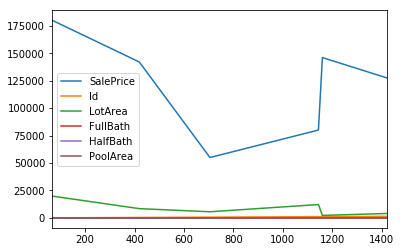

In [13]:
train_data.groupby(['YrSold','MoSold'])['SalePrice','Id','LotArea','HouseStyle','FullBath','HalfBath','PoolArea'].plot();
plt.show()

In [14]:
train_data.isnull().any()[:20]

Id              False
MSSubClass      False
MSZoning        False
LotFrontage      True
LotArea         False
Street          False
Alley            True
LotShape        False
LandContour     False
Utilities       False
LotConfig       False
LandSlope       False
Neighborhood    False
Condition1      False
Condition2      False
BldgType        False
HouseStyle      False
OverallQual     False
OverallCond     False
YearBuilt       False
dtype: bool

In [15]:
types_df = train_data.dtypes.to_frame('type')

In [16]:
numeric_cols = types_df[(types_df.type == 'int64') | (types_df.type == 'float64')].index.tolist()

In [17]:
len(numeric_cols)

38

In [18]:
numeric_cols.remove('Id')

In [19]:
cat_cols = types_df[types_df.type == 'object'].index.tolist()


In [20]:
len(cat_cols)

43

                 ---------------- ['MSSubClass', 'LotFrontage', 'LotArea'] ---------------------


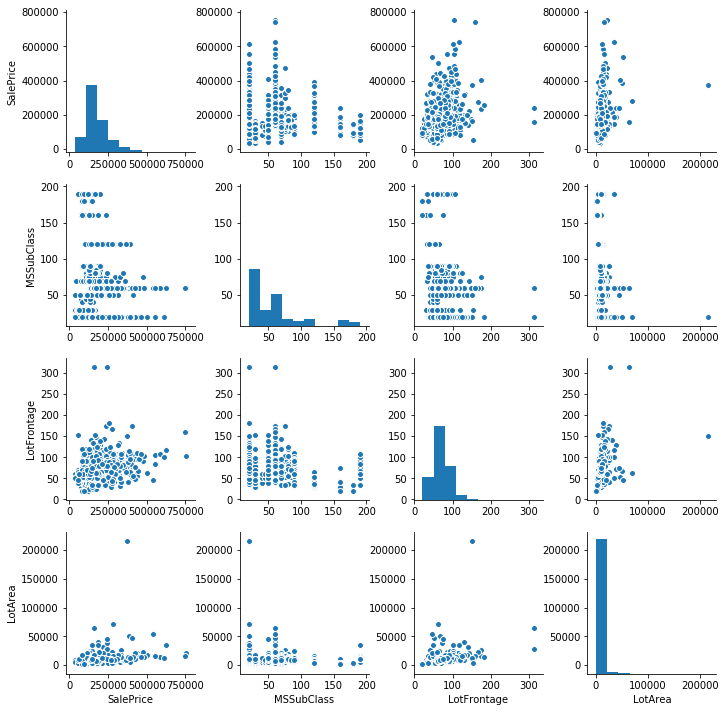

                 ---------------- ['OverallQual', 'OverallCond', 'YearBuilt'] ---------------------


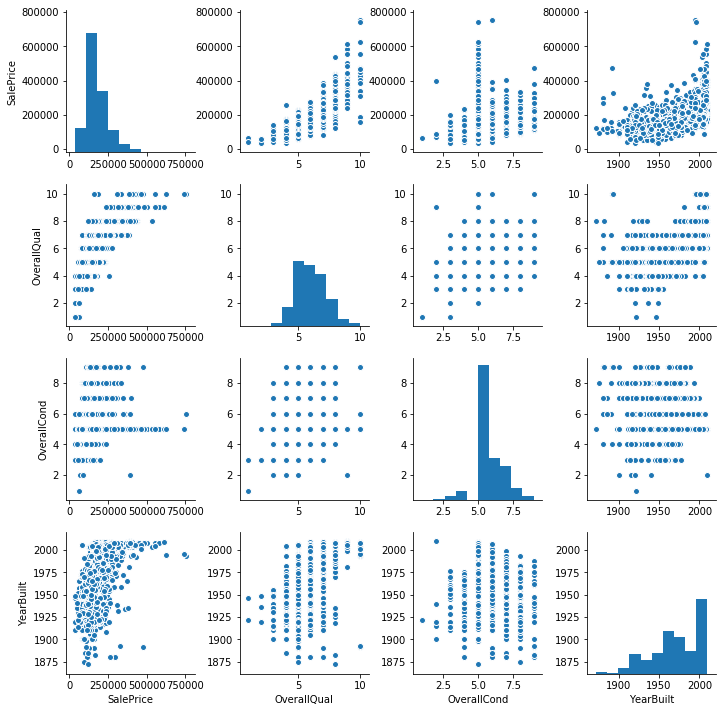

                 ---------------- ['YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1'] ---------------------


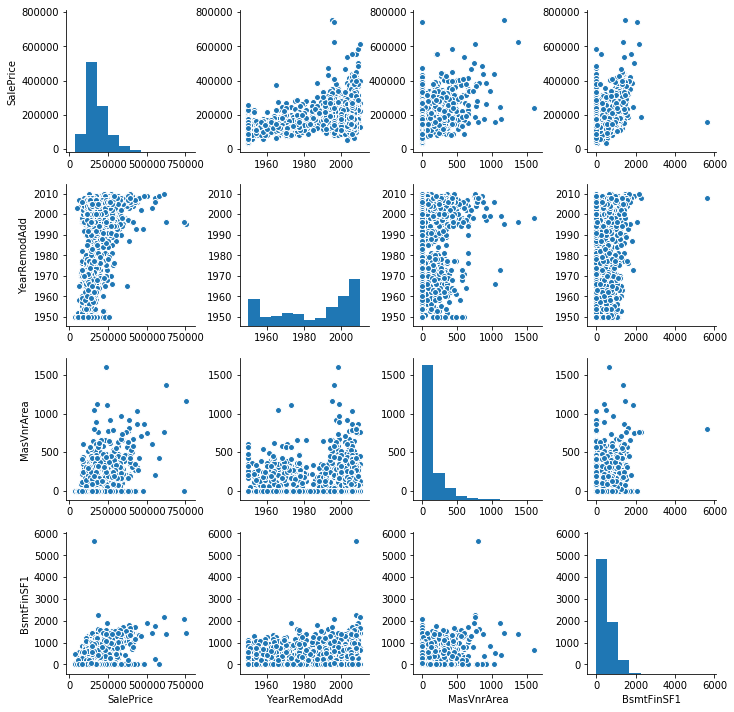

                 ---------------- ['BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'] ---------------------


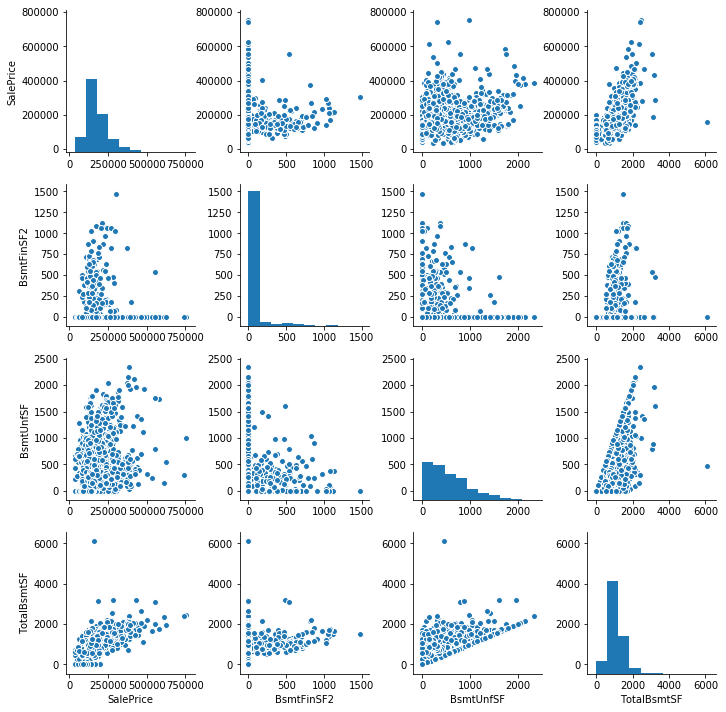

                 ---------------- ['1stFlrSF', '2ndFlrSF', 'LowQualFinSF'] ---------------------


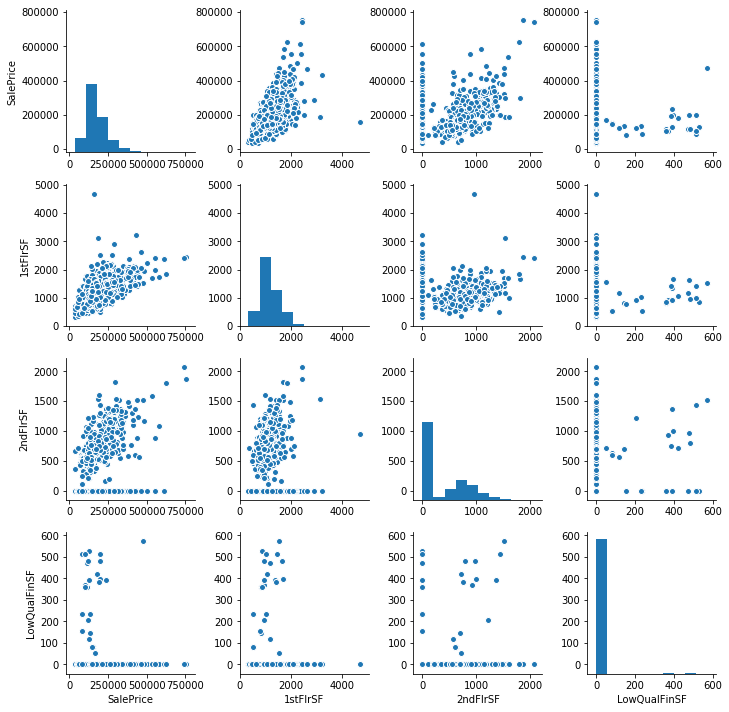

                 ---------------- ['GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'] ---------------------


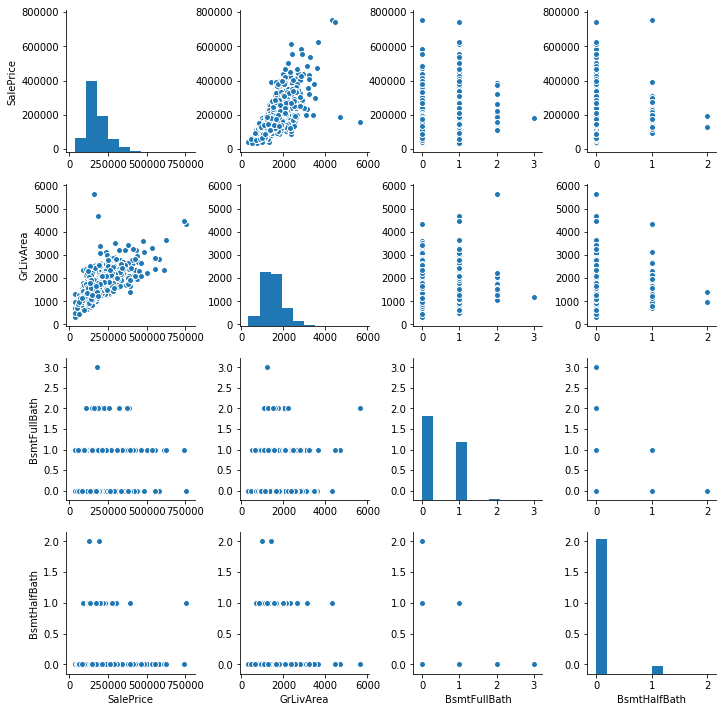

                 ---------------- ['FullBath', 'HalfBath', 'BedroomAbvGr'] ---------------------


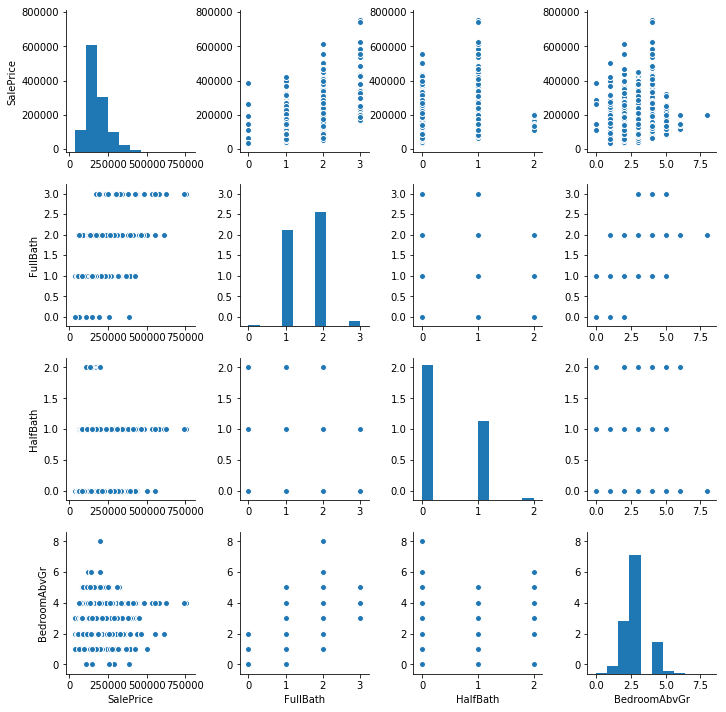

                 ---------------- ['KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces'] ---------------------


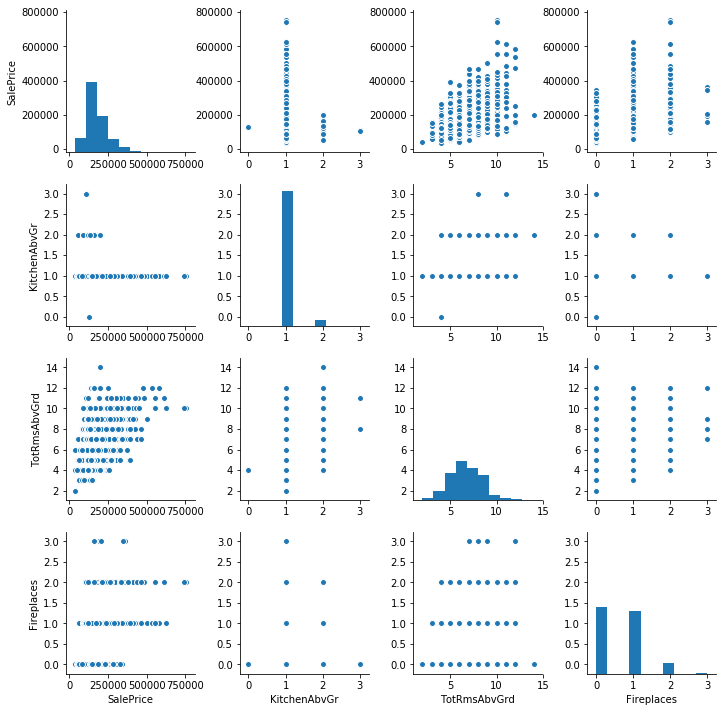

                 ---------------- ['GarageYrBlt', 'GarageCars', 'GarageArea'] ---------------------


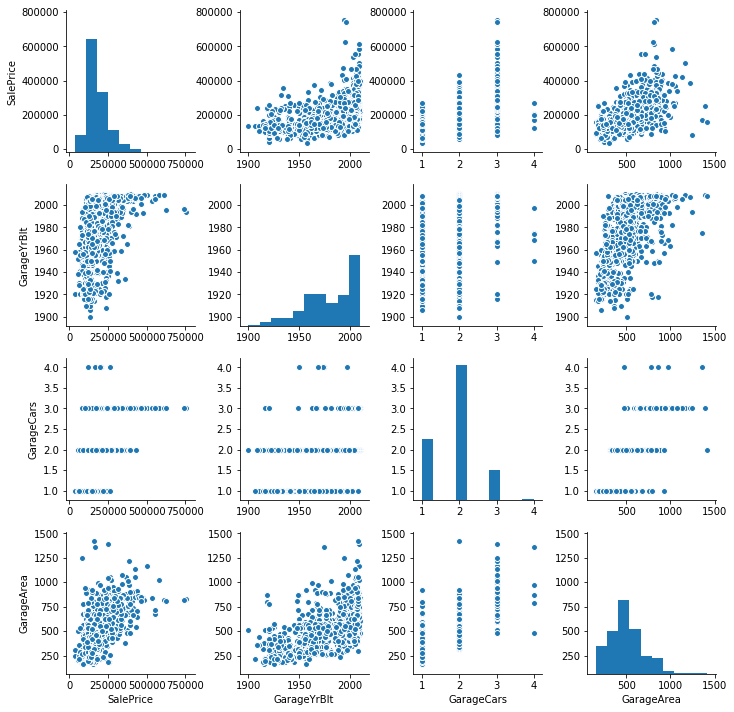

                 ---------------- ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'] ---------------------


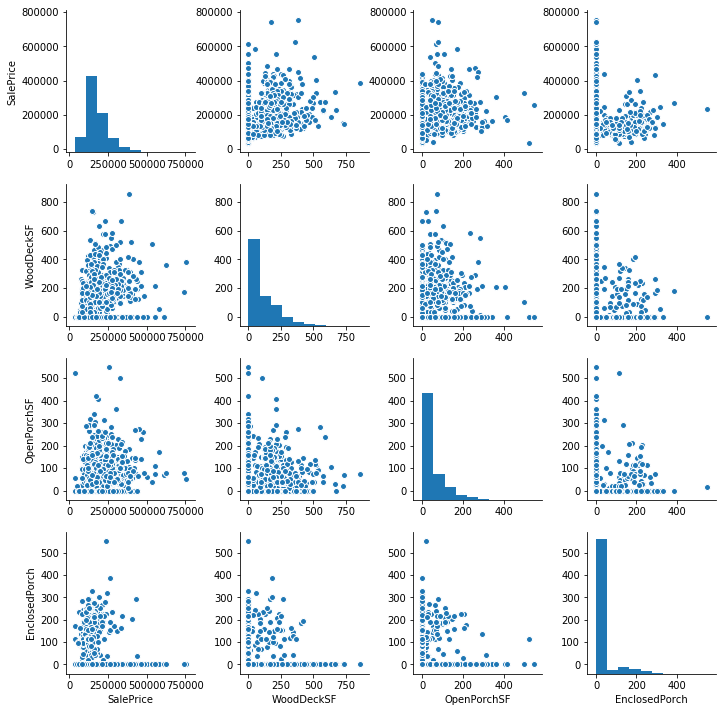

                 ---------------- ['3SsnPorch', 'ScreenPorch', 'PoolArea'] ---------------------


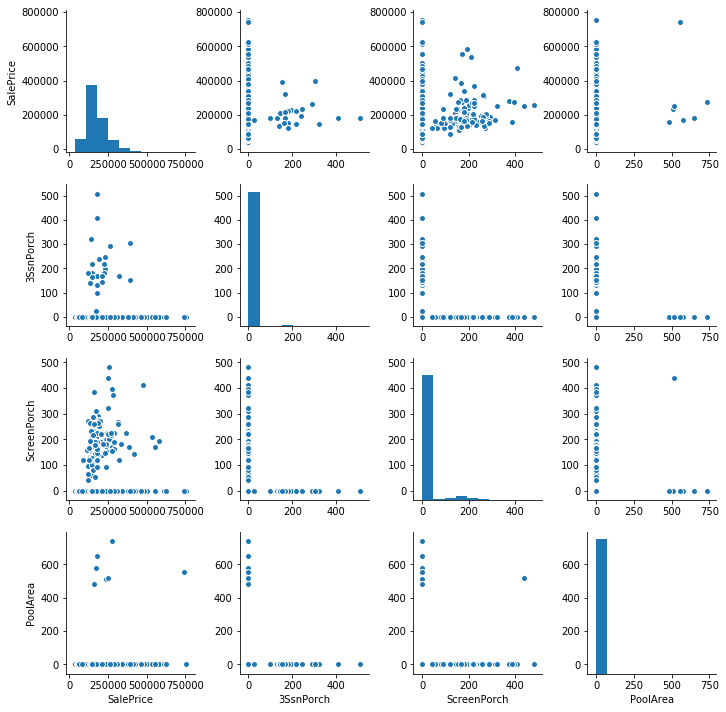

                 ---------------- ['MiscVal', 'MoSold', 'YrSold'] ---------------------


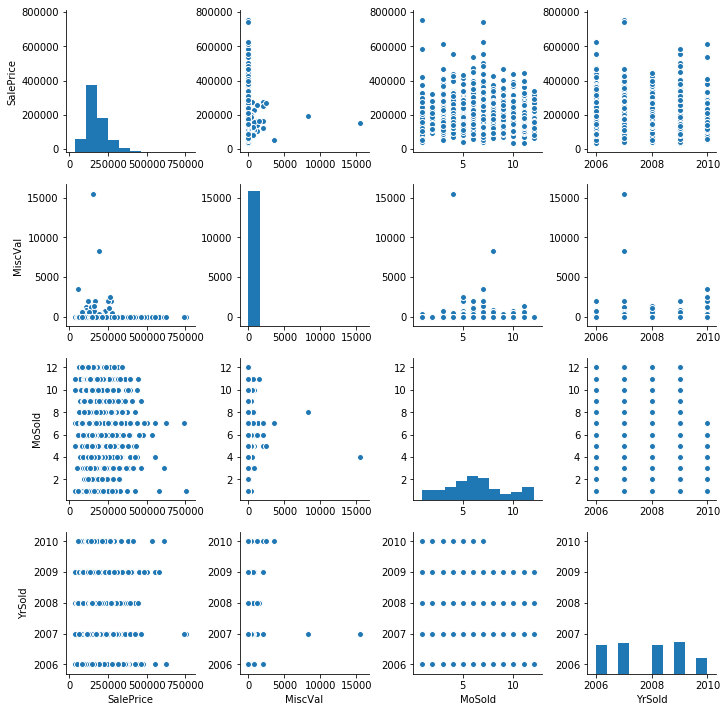

                 ---------------- ['SalePrice'] ---------------------


ValueError: x must have 2 or fewer dimensions

In [21]:
for i in range(0,len(numeric_cols), 3):
    print('                 ----------------', numeric_cols[i:i+3], '---------------------')
    cols = ['SalePrice'] + numeric_cols[i:i+3]
    
    sns.pairplot(train_data[cols].dropna())
    plt.show()

In [22]:
# compute the correlation matrix
corr = train_data.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


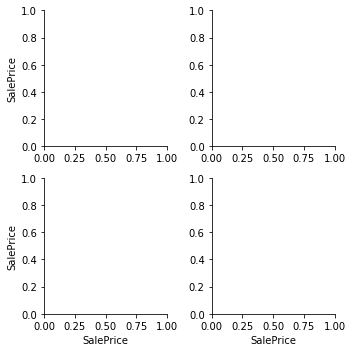

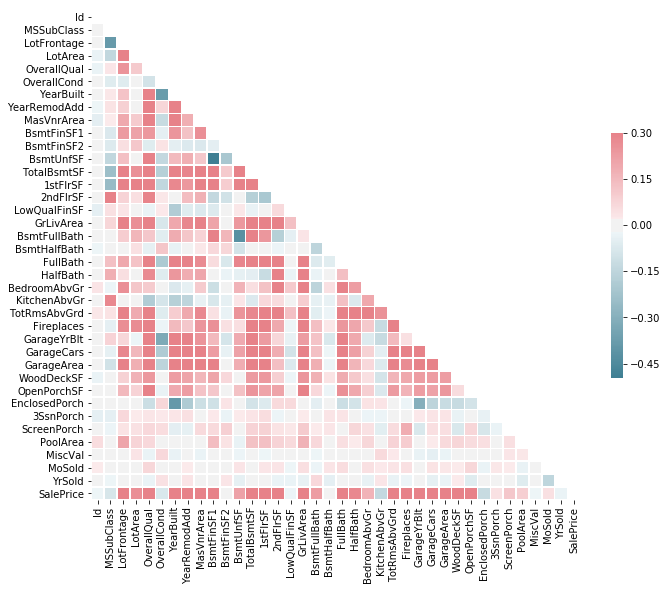

In [23]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

#Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 0.3,
           center = 0, square = True, linewidth = 0.5, 
            cbar_kws = {'shrink': 0.5});
plt.show()

#considering s single feature and plotting

#trainging for BedroomAbvGr vs SalePrice

In [24]:
train_df_subset = train_data.iloc[:,25:52]

In [25]:
train_df_subset.columns

Index(['MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr'],
      dtype='object')

In [26]:
train_df_subset.dtypes


MasVnrType       object
MasVnrArea      float64
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1        int64
BsmtFinType2     object
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
1stFlrSF          int64
2ndFlrSF          int64
LowQualFinSF      int64
GrLivArea         int64
BsmtFullBath      int64
BsmtHalfBath      int64
FullBath          int64
HalfBath          int64
BedroomAbvGr      int64
dtype: object

In [27]:
#subsetting training data
train_few = train_data.loc[: ,['Id','BedroomAbvGr','SalePrice']]

In [28]:
train_few.BedroomAbvGr.unique()

array([3, 4, 1, 2, 0, 5, 6, 8], dtype=int64)

In [29]:
#As the salePrice is Quantitative variable(continous), going for Linear Regression
from sklearn.linear_model import LinearRegression

In [30]:
#creating an instance of LinearRegression
reg = LinearRegression()

In [31]:
#Bedroomabvgr on x axis dropping the id and saleprice
X_BedroomAbvGr = train_few.drop(['Id','SalePrice'],axis=1).values

In [32]:
train_few.BedroomAbvGr.value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

In [33]:
print(X_BedroomAbvGr)

[[3]
 [3]
 [3]
 ..., 
 [4]
 [2]
 [3]]


In [34]:
#calculating the y series to be the target variable
y = train_few['SalePrice'].values

In [35]:
#create the prediction space
prediction_space = np.linspace(min(X_BedroomAbvGr), max(X_BedroomAbvGr)).reshape(-1,1)

In [36]:
#fit the model to the data
reg.fit(X_BedroomAbvGr,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
#Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

In [38]:
y_pred

array([ 133966.02049739,  136640.47224972,  139314.92400204,
        141989.37575437,  144663.82750669,  147338.27925902,
        150012.73101134,  152687.18276366,  155361.63451599,
        158036.08626831,  160710.53802064,  163384.98977296,
        166059.44152529,  168733.89327761,  171408.34502994,
        174082.79678226,  176757.24853459,  179431.70028691,
        182106.15203924,  184780.60379156,  187455.05554389,
        190129.50729621,  192803.95904854,  195478.41080086,
        198152.86255318,  200827.31430551,  203501.76605783,
        206176.21781016,  208850.66956248,  211525.12131481,
        214199.57306713,  216874.02481946,  219548.47657178,
        222222.92832411,  224897.38007643,  227571.83182876,
        230246.28358108,  232920.73533341,  235595.18708573,
        238269.63883806,  240944.09059038,  243618.5423427 ,
        246292.99409503,  248967.44584735,  251641.89759968,
        254316.349352  ,  256990.80110433,  259665.25285665,
        262339.70460898,

In [39]:
# Print R^2
print(reg.score(X_BedroomAbvGr,y))

0.0282956652798


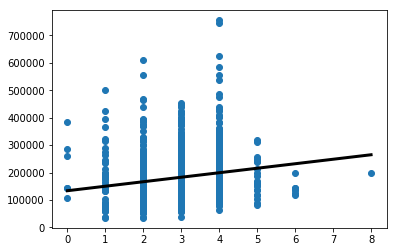

In [40]:
#scatter plot 
#plot the regression line
plt.scatter(X_BedroomAbvGr,y);
plt.plot(prediction_space,y_pred,color='black',linewidth=3);
plt.show()

#oops...done the reg line on a categorical variable....mistake

In [41]:
train_data.GrLivArea.head()

0    1710
1    1262
2    1786
3    1717
4    2198
Name: GrLivArea, dtype: int64

#considering the Living area and drawing the reg line to see if it has a corr with SalePrice

In [42]:
train_livarea = train_data.loc[: ,['GrLivArea','SalePrice']]

In [43]:
X_GrLivArea = train_livarea.drop(['SalePrice'],axis=1).values

In [44]:
y=train_livarea.SalePrice.values


In [45]:
prediction_sp = np.linspace(min(X_GrLivArea), max(X_GrLivArea)).reshape(-1,1)

In [46]:
reg.fit(X_GrLivArea,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
y_pr = reg.predict(prediction_sp)

In [48]:
print(reg.score(X_GrLivArea,y))

0.502148650272


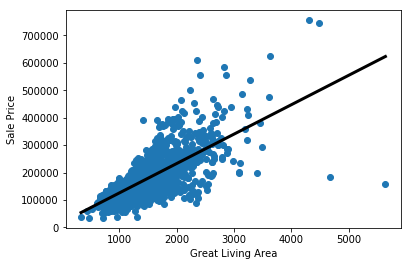

In [49]:
plt.scatter(X_GrLivArea,y);
plt.xlabel("Great Living Area");
plt.ylabel("Sale Price")
plt.plot(prediction_sp,y_pr,color='black',linewidth=3);
plt.show()

In [50]:
'''#train the model on single feature - GrLivArea: Above grade (ground) living area square feet

train_livarea = train_data.loc[: ,['GrLivArea','SalePrice']]

X_GrLivArea = train_livarea.drop(['SalePrice'],axis=1).values
y=train_livarea.SalePrice.values
## Create the regressor: reg
reg = LinearRegression()
# Create the prediction space
prediction_sp = np.linspace(min(X_GrLivArea), max(X_GrLivArea)).reshape(-1,1)
#fit the model
reg.fit(X_GrLivArea,y)
# Compute predictions over the prediction space: y_pre
y_pr = reg.predict(prediction_sp)

#find the accuracy rate #### it is 0.5 ..50%
print(reg.score(X_GrLivArea,y))

#do the scatter plot and then reg line
plt.scatter(X_GrLivArea,y);
plt.xlabel("Great Living Area");
plt.ylabel("Sale Price")
plt.plot(prediction_sp,y_pr,color='black',linewidth=3);
plt.show()
'''

'#train the model on single feature - GrLivArea: Above grade (ground) living area square feet\n\ntrain_livarea = train_data.loc[: ,[\'GrLivArea\',\'SalePrice\']]\n\nX_GrLivArea = train_livarea.drop([\'SalePrice\'],axis=1).values\ny=train_livarea.SalePrice.values\n## Create the regressor: reg\nreg = LinearRegression()\n# Create the prediction space\nprediction_sp = np.linspace(min(X_GrLivArea), max(X_GrLivArea)).reshape(-1,1)\n#fit the model\nreg.fit(X_GrLivArea,y)\n# Compute predictions over the prediction space: y_pre\ny_pr = reg.predict(prediction_sp)\n\n#find the accuracy rate #### it is 0.5 ..50%\nprint(reg.score(X_GrLivArea,y))\n\n#do the scatter plot and then reg line\nplt.scatter(X_GrLivArea,y);\nplt.xlabel("Great Living Area");\nplt.ylabel("Sale Price")\nplt.plot(prediction_sp,y_pr,color=\'black\',linewidth=3);\nplt.show()\n'

#GOOD...Great Living area has a positive linear correlation withe the sale price of the house ....

#

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error,mean_squared_error
from sklearn.model_selection import train_test_split

In [52]:
X_GrLivArea

array([[1710],
       [1262],
       [1786],
       ..., 
       [2340],
       [1078],
       [1256]], dtype=int64)

In [54]:
# Create training and test sets
X_train , X_test,y_train,y_test = train_test_split(X_GrLivArea,y,test_size=0.3,random_state=42)

In [55]:
#create the regressor
reg_all = LinearRegression()

In [56]:
#fit the regressor model to the training data
reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
#predict on the test data
y_pred1 = reg_all.predict(X_test)

In [58]:
#compute the R^2 and RMSE
print("R^2 : {}".format(reg_all.score(X_test,y_test)))

R^2 : 0.5507664896759454


In [59]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred1))

In [60]:
rmsle = np.sqrt(mean_squared_log_error(y_test,y_pred1))

In [61]:
rmsle

0.27389838611207384

In [62]:
print("rmse : {}".format(rmse))

rmse : 55989.227138773305


#dropping the columns

In [63]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [64]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [65]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [66]:
train_data.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [67]:
train_data[train_data.Utilities=='NoSeWa']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
944,945,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,NoSeWa,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500


# Features (columns) to model for -- 

In [68]:
cols = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','SalePrice']

In [69]:
from sklearn import linear_model

In [70]:
# create a regressor
reg_lin = linear_model.LinearRegression()

In [71]:
train_data[cols].isnull().any()

OverallQual    False
GrLivArea      False
GarageCars     False
GarageArea     False
TotalBsmtSF    False
SalePrice      False
dtype: bool

In [72]:
train_subset = train_data[cols]

In [73]:
train_subset.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,SalePrice
0,7,1710,2,548,856,208500
1,6,1262,2,460,1262,181500
2,7,1786,2,608,920,223500
3,7,1717,3,642,756,140000
4,8,2198,3,836,1145,250000


In [74]:
X = train_subset.drop('SalePrice',axis=1)

In [75]:
y=train_subset['SalePrice']

In [76]:
reg_lin.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [77]:
X_train , X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [78]:
reg_lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [80]:
cols2 = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']
test_subset = test_data[cols2]

In [81]:
test_subset.isnull().sum()

OverallQual    0
GrLivArea      0
GarageCars     1
GarageArea     1
TotalBsmtSF    1
dtype: int64

In [82]:
test_subset = test_subset.fillna(test_subset.mean())


In [83]:
y_predict = reg_lin.predict(test_subset)

In [84]:
y_predict

array([ 111462.46831375,  160693.97690943,  159000.45578927, ...,
        150668.85194762,   89878.20402336,  244230.0943604 ])

In [85]:
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [86]:
sample_submission.SalePrice = y_predict

In [87]:
sample_submission.to_csv('WavingTigers.csv',index=False)

In [88]:
y_test

892     154500
1105    325000
413     115000
522     159000
1036    315500
614      75500
218     311500
1160    146000
649      84500
887     135500
576     145000
1252    130000
1061     81000
567     214000
1108    181000
1113    134500
168     183500
1102    135000
1120    118400
67      226000
1040    155000
453     210000
670     173500
1094    129000
192     192000
123     153900
415     181134
277     141000
433     181000
1317    208900
         ...  
621     240000
1157    230000
1322    190000
704     213000
1323     82500
199     274900
493     155000
664     423000
1339    128500
1058    335000
1187    262000
10      129500
147     222500
764     270000
282     207500
298     175000
918     238000
291     135900
819     224000
573     170000
1454    185000
549     263000
462      62383
129     150000
845     171000
331     139000
323     126175
650     205950
439     110000
798     485000
Name: SalePrice, Length: 438, dtype: int64

In [89]:
print("R^2 : {}".format(reg_lin.score(X_test,y_test)))

R^2 : 0.7936613418610983


In [90]:
import numpy as np

In [91]:
print("rmse : {}".format(rmse))

rmse : 55989.227138773305


In [92]:
y_test[y_test > 100000]

892     154500
1105    325000
413     115000
522     159000
1036    315500
218     311500
1160    146000
887     135500
576     145000
1252    130000
567     214000
1108    181000
1113    134500
168     183500
1102    135000
1120    118400
67      226000
1040    155000
453     210000
670     173500
1094    129000
192     192000
123     153900
415     181134
277     141000
433     181000
1317    208900
184     127000
554     284000
1173    200500
         ...  
1189    189000
943     143000
621     240000
1157    230000
1322    190000
704     213000
199     274900
493     155000
664     423000
1339    128500
1058    335000
1187    262000
10      129500
147     222500
764     270000
282     207500
298     175000
918     238000
291     135900
819     224000
573     170000
1454    185000
549     263000
129     150000
845     171000
331     139000
323     126175
650     205950
439     110000
798     485000
Name: SalePrice, Length: 402, dtype: int64

In [93]:
y_predict[y_predict > 100000]

array([ 111462.46831375,  160693.97690943,  159000.45578927, ...,
        132458.93128326,  150668.85194762,  244230.0943604 ])

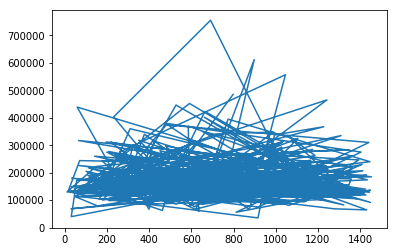

In [94]:
plt.plot(y_test);
plt.show()

In [95]:
 d = {'y_predict': y_predict, 'y_test': y_test}

In [96]:
d

{'y_predict': array([ 111462.46831375,  160693.97690943,  159000.45578927, ...,
         150668.85194762,   89878.20402336,  244230.0943604 ]),
 'y_test': 892     154500
 1105    325000
 413     115000
 522     159000
 1036    315500
 614      75500
 218     311500
 1160    146000
 649      84500
 887     135500
 576     145000
 1252    130000
 1061     81000
 567     214000
 1108    181000
 1113    134500
 168     183500
 1102    135000
 1120    118400
 67      226000
 1040    155000
 453     210000
 670     173500
 1094    129000
 192     192000
 123     153900
 415     181134
 277     141000
 433     181000
 1317    208900
          ...  
 621     240000
 1157    230000
 1322    190000
 704     213000
 1323     82500
 199     274900
 493     155000
 664     423000
 1339    128500
 1058    335000
 1187    262000
 10      129500
 147     222500
 764     270000
 282     207500
 298     175000
 918     238000
 291     135900
 819     224000
 573     170000
 1454    185000
 549     26300

In [ ]:
###########

In [97]:
reg_lin.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [98]:
test_cols = ['Id',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF']

In [99]:
test_data[test_cols].head(5)

,Id,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF
0,1461,5,896,1.0,730.0,882.0
1,1462,6,1329,1.0,312.0,1329.0
2,1463,5,1629,2.0,482.0,928.0
3,1464,6,1604,2.0,470.0,926.0
4,1465,8,1280,2.0,506.0,1280.0


In [100]:
test_data[test_cols].isnull().sum()

Id             0
OverallQual    0
GrLivArea      0
GarageCars     1
GarageArea     1
TotalBsmtSF    1
dtype: int64

In [101]:
test_data[test_data[test_cols]['GarageCars'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1116,2577,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca


In [102]:
test_data[test_data[test_cols]['GarageArea'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1116,2577,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca


In [103]:
X_test= test_data[test_cols].values

In [104]:
test_data[test_cols].isnull().any()

Id             False
OverallQual    False
GrLivArea      False
GarageCars      True
GarageArea      True
TotalBsmtSF     True
dtype: bool

In [105]:
test_data[test_cols].isnull().sum()

Id             0
OverallQual    0
GrLivArea      0
GarageCars     1
GarageArea     1
TotalBsmtSF    1
dtype: int64

In [106]:
X_test = test_data[test_cols].dropna()

In [107]:
X_test.isnull().sum()

Id             0
OverallQual    0
GrLivArea      0
GarageCars     0
GarageArea     0
TotalBsmtSF    0
dtype: int64

In [108]:
X_test = X_test.values

In [109]:
test_data.shape

(1459, 80)

# MULTIPLE FEATURES  - LINEAR REGRESSION

In [110]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score , cross_val_predict
from sklearn.linear_model import Ridge , Lasso

import re

In [111]:
area_cols = [x for x in numeric_cols if re.search(r'Area|SF|Porch', x)]

In [113]:
#Convert the area,sf & porch columns into log colmns
#train_data[area_cols]  = train_data[area_cols].apply(np.log1p) 
#test_data[area_cols] = test_data[area_cols].apply(np.log1p)

In [114]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,9.042040,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9.169623,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,9.328212,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9.164401,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,9.565284,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [115]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,9.360741,Pave,NaN,Reg,Lvl,AllPub,...,4.795791,0.0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,9.565775,Pave,NaN,IR1,Lvl,AllPub,...,0.000000,0.0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,9.534668,Pave,NaN,IR1,Lvl,AllPub,...,0.000000,0.0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9.208238,Pave,NaN,IR1,Lvl,AllPub,...,0.000000,0.0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,8.518392,Pave,NaN,IR1,HLS,AllPub,...,4.976734,0.0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [115]:
test_cols = ['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF']

In [116]:

train_subset = train_data[cols]
test_subset = test_data[test_cols]

In [117]:
train_subset.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,SalePrice
0,7,7.444833,2,6.308098,6.753438,208500
1,6,7.141245,2,6.133398,7.141245,181500
2,7,7.488294,2,6.411818,6.825460,223500
3,7,7.448916,3,6.466145,6.629363,140000
4,8,7.695758,3,6.729824,7.044033,250000


In [118]:
test_subset.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF
0,5,6.799056,1.0,6.594413,6.783325
1,6,7.192934,1.0,5.746203,7.192934
2,5,7.396335,2.0,6.180017,6.834109
3,6,7.380879,2.0,6.154858,6.831954
4,8,7.155396,2.0,6.228511,7.155396


In [119]:
X = train_subset.drop('SalePrice',axis=1)

In [120]:
y = train_subset['SalePrice']

In [121]:
X.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF
0,7,7.444833,2,6.308098,6.753438
1,6,7.141245,2,6.133398,7.141245
2,7,7.488294,2,6.411818,6.825460
3,7,7.448916,3,6.466145,6.629363
4,8,7.695758,3,6.729824,7.044033


In [122]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [123]:
reg_linear = LinearRegression()

In [124]:
reg_linear.fit(X,np.log(y))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [125]:
X.isnull().any()

OverallQual    False
GrLivArea      False
GarageCars     False
GarageArea     False
TotalBsmtSF    False
dtype: bool

In [126]:
y.isnull().any()

False

In [127]:
test_subset.isnull().any()

OverallQual    False
GrLivArea      False
GarageCars      True
GarageArea      True
TotalBsmtSF     True
dtype: bool

In [128]:
test_subset = test_subset.fillna(0)

In [129]:
test_subset.isnull().any()

OverallQual    False
GrLivArea      False
GarageCars     False
GarageArea     False
TotalBsmtSF    False
dtype: bool

In [130]:
y_predict = np.exp(reg_linear.predict(test_subset))

In [131]:
y_predict

array([ 110463.1087097 ,  148065.94678722,  156942.37788054, ...,
        142112.29877617,   99580.08205251,  248685.90982915])

In [132]:
submission_df = pd.DataFrame(data ={'Id' : test_data.Id, 'SalePrice': y_predict}).set_index('Id')

In [133]:
submission_df.head()

,SalePrice
Id,
1461,110463.108710
1462,148065.946787
1463,156942.377881
1464,177422.057012
1465,212998.537149


In [134]:
reg_linear.coef_

array([ 0.12872141,  0.38400805,  0.12090347,  0.00219411,  0.03628667])

In [135]:
test_subset.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF
0,5,6.799056,1.0,6.594413,6.783325
1,6,7.192934,1.0,5.746203,7.192934
2,5,7.396335,2.0,6.180017,6.834109
3,6,7.380879,2.0,6.154858,6.831954
4,8,7.155396,2.0,6.228511,7.155396


# submitted the linear_model - 

In [136]:
submission_df.to_csv('submission.csv') 

# want to do a cross validation......

In [137]:
cv_results = cross_val_score(reg_linear,X,y,cv=5)

In [138]:
cv_results

array([ 0.77127094,  0.74926782,  0.7127764 ,  0.704112  ,  0.69234495])

In [139]:
print("Average 5 -fold CV score : {} " .format(np.mean(cv_results)))

Average 5 -fold CV score : 0.7259544206503618 


### comparing 3 fold cv and 10 fold cv

In [140]:
cv_3  = cross_val_score(reg_linear,X,y,cv=3)

In [141]:
cv_3

array([ 0.77315067,  0.70553247,  0.7026486 ])

In [142]:
print("Avg 3 fold CV score : {} ".format(np.mean(cv_3)))

Avg 3 fold CV score : 0.727110581467923 


In [143]:
cv_10 = cross_val_score(reg_linear,X,y,cv=10)

In [144]:
cv_10

array([ 0.7355725 ,  0.78843528,  0.81403935,  0.68846678,  0.71241414,
        0.72185714,  0.70639539,  0.70559224,  0.6469357 ,  0.75574481])

In [145]:
print("Avg 10 fold cv score : {}".format(np.mean(cv_10)))

Avg 10 fold cv score : 0.7275453326763711


In [146]:
predicted = cross_val_predict(reg_linear, X, y, cv=5)

In [147]:
predicted

array([ 221202.12968192,  176241.9452569 ,  223883.89902719, ...,
        219252.24341346,  111926.85100551,  122897.66076282])

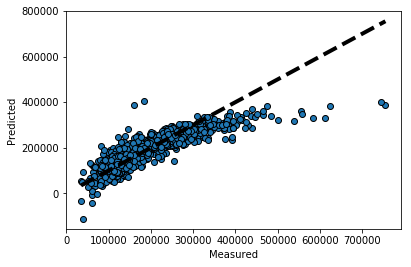

In [149]:
# 'Plotting Cross Validated Predictions'
fig, ax = plt.subplots()
ax.scatter(y ,predicted,  edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)

ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# regularize using Ridge reg

In [150]:
reg_ridge = Ridge(alpha=0.1,normalize=True)
#reg_linear.fit(X,np.log(y))

In [151]:
reg_ridge.fit(X,np.log(y))

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [152]:
ridge_predict = np.exp(reg_ridge.predict(test_subset))
#y_predict = np.exp(reg_linear.predict(test_subset))

In [153]:
ridge_predict

array([ 113393.31185933,  148983.72507837,  158741.13861909, ...,
        144409.90100051,   98838.77452278,  244655.48714824])

In [154]:
submission_ridge = pd.DataFrame(data ={'Id' : test_data.Id, 'SalePrice': ridge_predict}).set_index('Id')

In [155]:
submission_ridge.head()

,SalePrice
Id,
1461,113393.311859
1462,148983.725078
1463,158741.138619
1464,177524.858261
1465,209252.137643


In [156]:
submission_ridge.to_csv('submission_ridge.csv') # kaggle score .18791

In [157]:
type(y)

pandas.core.series.Series

In [158]:
ridge_predict = ridge_predict.reshape(-1,1)


In [171]:
# lasso regression

In [159]:
names = train_subset.drop(['SalePrice'],axis=1).columns

In [160]:
names

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF'], dtype='object')

In [161]:
lasso = Lasso(alpha=0.1,normalize=True)

In [162]:
lasso_coef = lasso.fit(X,y).coef_

In [163]:
lasso_coef

array([ 26366.45640914,  69088.62534063,  30355.35248818,  -5891.8784054 ,
         4632.71599782])

In [164]:
range(len(names))

range(0, 5)

In [165]:
_ = plt.plot(range(len(names)) , lasso_coef)

In [166]:
_ = plt.xticks(range(len(names)),names,rotation=90)

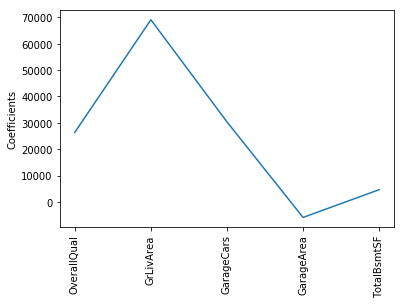

In [167]:
_ = plt.ylabel("Coefficients")
plt.show()

# lasso is great for feature selection - our case GrLivArea is most important feature

In [168]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [169]:
cat_cols[:5]

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour']

In [170]:
numeric_cols[:5]

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond']

In [171]:
train_data['FullBath'].unique()

array([2, 1, 3, 0], dtype=int64)

In [172]:
area_constructed_cols = ['BsmtFinSF1','BsmtFinSF2','GrLivArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','ScreenPorch']

In [191]:
total_area_constructed = train_data['LotArea'] - train_data[area_constructed_cols]

C:\Users\Suhasini\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:3033: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


In [193]:
total_area_constructed.head()

,BsmtFinSF1,BsmtFinSF2,GrLivArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,0,1,2,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
X.describe()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,7.268512,1.767123,5.808156,6.750560
std,1.382997,0.333303,0.747315,1.455118,1.145712
min,1.000000,5.814131,0.000000,0.000000,0.000000
25%,5.000000,7.030415,1.000000,5.815592,6.680541
50%,6.000000,7.289611,2.000000,6.175867,6.900227
75%,7.000000,7.483104,2.000000,6.357842,7.169542
max,10.000000,8.638171,4.000000,7.257708,8.717846


#  random forest resgressor

In [192]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [184]:
forest_model = RandomForestRegressor()

In [185]:
forest_model.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [186]:
forest_predict =forest_model.predict(test_subset)

In [187]:
forest_predict

array([ 130610.        ,  159749.        ,  158240.        , ...,
        160798.7       ,  106856.66666667,  236880.3       ])

In [188]:
submission_randomforest = pd.DataFrame(data ={'Id' : test_data.Id, 'SalePrice': forest_predict}).set_index('Id')

In [189]:
submission_randomforest.head()

,SalePrice
Id,
1461,130610.0
1462,159749.0
1463,158240.0
1464,178100.0
1465,241500.0


In [190]:
submission_randomforest.to_csv('submission_randomforest.csv')

In [193]:
print(mean_absolute_error(y, forest_predict))

ValueError: Found input variables with inconsistent numbers of samples: [1460, 1459]

In [194]:
len(y)

1460

In [195]:
len(test_subset)

1459

In [198]:
print(y[:100] , test_subset[:100])

0     208500
1     181500
2     223500
3     140000
4     250000
5     143000
6     307000
7     200000
8     129900
9     118000
10    129500
11    345000
12    144000
13    279500
14    157000
15    132000
16    149000
17     90000
18    159000
19    139000
20    325300
21    139400
22    230000
23    129900
24    154000
25    256300
26    134800
27    306000
28    207500
29     68500
       ...  
70    244000
71    129500
72    185000
73    144900
74    107400
75     91000
76    135750
77    127000
78    136500
79    110000
80    193500
81    153500
82    245000
83    126500
84    168500
85    260000
86    174000
87    164500
88     85000
89    123600
90    109900
91     98600
92    163500
93    133900
94    204750
95    185000
96    214000
97     94750
98     83000
99    128950
Name: SalePrice, Length: 100, dtype: int64     OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF
0             5   6.799056         1.0    6.594413     6.783325
1             6   7.192934         1

In [200]:
models = [LinearRegression(),Ridge(),Lasso(alpha=0.01,max_iter=10000),RandomForestRegressor(),GradientBoostingRegressor(),SVR(),LinearSVR(),
          ElasticNet(alpha=0.001,max_iter=10000),SGDRegressor(max_iter=1000,tol=1e-3),BayesianRidge(),KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
          ExtraTreesRegressor(),XGBRegressor()]

names = ["LR", "Ridge", "Lasso", "RF", "GBR", "SVR", "LinSVR", "Ela","SGD","Bay","Ker","Extra","Xgb"]
for name, model in zip(names, models):
    score = rmse_cv(model, X_scaled, y_log)
    print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))
    

NameError: name 'GradientBoostingRegressor' is not defined

In [202]:
from xgboost import XGBRegressor

In [203]:
reg_xgb = XGBRegressor()

In [204]:
reg_xgb.fit(X,y,verbose=True)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [207]:
xgb_predict = reg_xgb.predict(test_subset)

In [208]:
submission_xgb = pd.DataFrame(data ={'Id' : test_data.Id, 'SalePrice': xgb_predict}).set_index('Id')

In [209]:
submission_xgb.to_csv('submission_xgb.csv')